# Ressources  

* https://keras.io/about/  


# Régression non linéaire avec un réseau de neurones

* https://lucidar.me/fr/neural-networks/curve-fitting-nonlinear-regression/  

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from math import cos, sin

# theta = np.linspace(-1000, 2*np.pi, 1000)
theta = np.linspace(-10, 10, num=1000)
r = np.sqrt(1.0)

def circle(theta=theta, r=r):
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    z = x + y
    return x, y, z

x, y, z = circle()


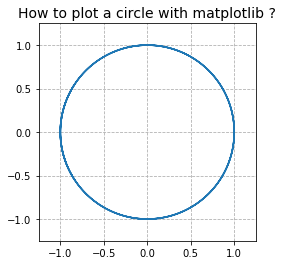

In [3]:
# Display the result in 2D
fig, ax = plt.subplots(1)

ax.plot(x, y)
ax.set_aspect(1)

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

plt.grid(linestyle='--')
plt.title('How to plot a circle with matplotlib ?', fontsize=14)

plt.show()

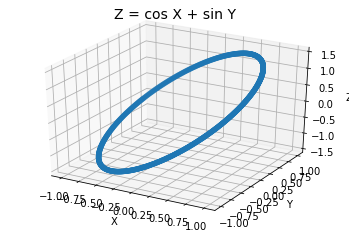

In [4]:
from mpl_toolkits.mplot3d import Axes3D

# Display the result in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title("Z = cos X + sin Y", fontsize=14)
plt.show()

In [5]:
# theta = np.linspace(-1000, 2*np.pi, 1000)
theta = np.linspace(-10, 10, num=1000)
noise = 0.1 * np.random.normal(size=1000)
r = np.sqrt(1.0)

x_data = r * np.cos(theta) + noise
y_data = r * np.sin(theta) + noise
z_data = r * (np.cos(theta) + np.sin(theta))
z_noise = np.array((x_data, y_data))

In [6]:
print('Theta', type(theta), theta.shape)
print('x_data', type(x_data), x_data.shape)
print('y_data', type(y_data), y_data.shape)
print('z_data', type(z_data), z_data.shape)
print('z_noise', type(z_noise), z_noise.shape)

Theta <class 'numpy.ndarray'> (1000,)
x_data <class 'numpy.ndarray'> (1000,)
y_data <class 'numpy.ndarray'> (1000,)
z_data <class 'numpy.ndarray'> (1000,)
z_noise <class 'numpy.ndarray'> (2, 1000)


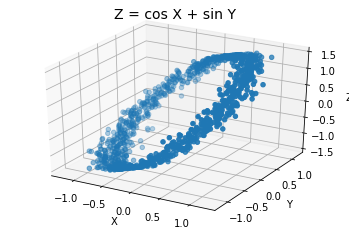

In [7]:
# Display the result in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title("Z = cos X + sin Y", fontsize=14)
plt.show()

In [8]:
z_noise = z_noise.T
print('Z_noise', type(z_noise), z_noise.shape)

Z_noise <class 'numpy.ndarray'> (1000, 2)


In [9]:
# Create the model
model_2 = keras.Sequential()
model_2.add(keras.layers.Dense(units=2, input_dim=2, activation='linear'))
model_2.add(keras.layers.Dense(units=64, activation='relu'))
model_2.add(keras.layers.Dense(units=64, activation='relu'))
model_2.add(keras.layers.Dense(units=1, activation='linear'))
model_2.compile(loss='mse', optimizer="adam")

# Display the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                192       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,423
Trainable params: 4,423
Non-trainable params: 0
_________________________________________________________________


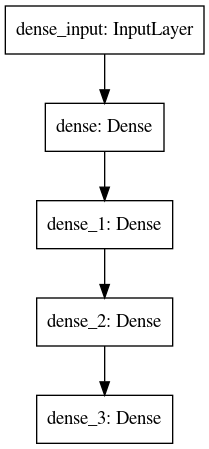

In [10]:
keras.utils.plot_model(model_2, "my_first_model_2.png")

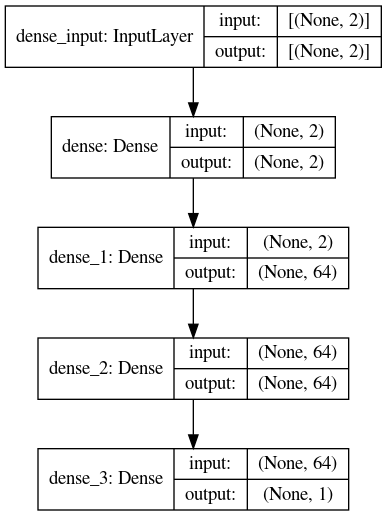

In [11]:
keras.utils.plot_model(model_2, "my_first_model_2_with_shape_info.png", show_shapes=True)

In [12]:
# Training
training_2 = model_2.fit(z_noise, z_data, epochs=100, verbose=2)

Epoch 1/100
32/32 - 1s - loss: 0.3659
Epoch 2/100
32/32 - 0s - loss: 0.0428
Epoch 3/100
32/32 - 0s - loss: 0.0316
Epoch 4/100
32/32 - 0s - loss: 0.0300
Epoch 5/100
32/32 - 0s - loss: 0.0300
Epoch 6/100
32/32 - 0s - loss: 0.0291
Epoch 7/100
32/32 - 0s - loss: 0.0286
Epoch 8/100
32/32 - 0s - loss: 0.0276
Epoch 9/100
32/32 - 0s - loss: 0.0273
Epoch 10/100
32/32 - 0s - loss: 0.0270
Epoch 11/100
32/32 - 0s - loss: 0.0269
Epoch 12/100
32/32 - 0s - loss: 0.0262
Epoch 13/100
32/32 - 0s - loss: 0.0255
Epoch 14/100
32/32 - 0s - loss: 0.0248
Epoch 15/100
32/32 - 0s - loss: 0.0246
Epoch 16/100
32/32 - 0s - loss: 0.0244
Epoch 17/100
32/32 - 0s - loss: 0.0240
Epoch 18/100
32/32 - 0s - loss: 0.0234
Epoch 19/100
32/32 - 0s - loss: 0.0227
Epoch 20/100
32/32 - 0s - loss: 0.0226
Epoch 21/100
32/32 - 0s - loss: 0.0217
Epoch 22/100
32/32 - 0s - loss: 0.0212
Epoch 23/100
32/32 - 0s - loss: 0.0210
Epoch 24/100
32/32 - 0s - loss: 0.0211
Epoch 25/100
32/32 - 0s - loss: 0.0200
Epoch 26/100
32/32 - 0s - loss: 0.

In [13]:
print('MIN', list(training_2.history), '=', min(training_2.history['loss']))

MIN ['loss'] = 0.0048779756762087345


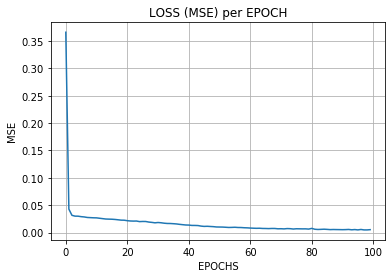

In [14]:
# plot metrics
fig, ax = plt.subplots()

# Add a grid
ax.grid()
# Add a title to the axes
ax.set_title('LOSS (MSE) per EPOCH')
# Add an x-label to the axes
ax.set_xlabel('EPOCHS')
# Add a y-label to the axes
ax.set_ylabel('MSE')

# Add a legend
#ax.legend()

ax.plot(training_2.history['loss'])


In [15]:
print('Theta', type(theta), theta.shape)
print('x_data', type(x_data), x_data.shape)
print('y_data', type(y_data), y_data.shape)
print('z_data', type(z_data), z_data.shape)
print('z_noise', type(z_noise), z_noise.shape)

Theta <class 'numpy.ndarray'> (1000,)
x_data <class 'numpy.ndarray'> (1000,)
y_data <class 'numpy.ndarray'> (1000,)
z_data <class 'numpy.ndarray'> (1000,)
z_noise <class 'numpy.ndarray'> (1000, 2)


In [16]:
# Compute the output 
y_pred_2 = model_2.predict(z_noise)
print('y-pred_2', type(y_pred_2), y_pred_2.shape)

y-pred_2 <class 'numpy.ndarray'> (1000, 1)


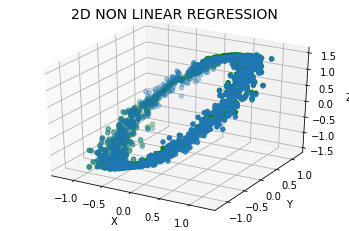

In [21]:
# Display the result in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_data, y_data, z_data, label='data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(x_data, y_data, y_pred_2, color='green', label='model_2')

plt.title("2D NON LINEAR REGRESSION", fontsize=14)
plt.show()